In [4]:
from __future__ import annotations
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

# Task 1: Acquire, Preprocess and Analyze the Data

## Hepatitis Data Set

In [ ]:
header_names = [
    "Class",
    "AGE",
    "SEX",
    "STEROID",
    "ANTIVIRALS",
    "FATIGUE",
    "MALAISE",
    "ANOREXIA",
    "LIVER BIG",
    "LIVER FIRM",
    "SPLEEN PALPABLE",
    "SPIDERS",
    "ASCITES",
    "VARICES",
    "BILIRUBIN",
    "ALK PHOSPHATE",
    "SGOT",
    "ALBUMIN",
    "PROTIME",
    "HISTOLOGY"]
df_hepatitis = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/hepatitis/hepatitis.data", names = header_names, index_col=False)


# Input "?" with NA and remove after
df_hepatitis.replace(to_replace="?", value=np.nan, inplace=True)

# PROTIME and ALK PHOSPHATE has a lot of NA records, thus removing this 2 columns so that we do not have to drop too many rows
df_hepatitis.isna().sum()

# Drop the 2 columns (considering them as malformed features -- too many "?"s) then remove the remaining "?" which was imputed as "NA", then reset index
df_hepatitis_clean= df_hepatitis.drop(columns=['ALK PHOSPHATE','PROTIME'])
df_hepatitis_clean.dropna(axis=0,inplace=True)
df_hepatitis_clean.reset_index(drop = True, inplace= True)
# Total of 26 rows removed.

# For those with values 1 or 2, they are supposed to be 0 and 1 representing boolean.
# First change all the types to float for KNN purposes
df_hepatitis_final= df_hepatitis_clean
for column in df_hepatitis_clean.columns:
    df_hepatitis_final[column] = df_hepatitis_clean[column].values.astype(float)

for column in df_hepatitis_final.columns:
    if column not in ['AGE', 'BILIRUBIN', 'SGOT', 'ALBUMIN']:
      df_hepatitis_final[column] = df_hepatitis_final[column] - 1

# Make class into INT
df_hepatitis_final['Class'] = [int(x) for x in df_hepatitis_final['Class']]

# 105 LIVE (labelled by 1) 24 DIE (labelled by 0) under "Class" Column
df_hepatitis_final.describe()

,Class,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER BIG,LIVER FIRM,SPLEEN PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,SGOT,ALBUMIN,HISTOLOGY
count,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000
mean,0.813953,40.806202,0.100775,0.534884,0.829457,0.348837,0.620155,0.798450,0.821705,0.550388,0.821705,0.651163,0.868217,0.868217,1.393798,79.465116,3.827907,0.441860
std,0.390661,11.985067,0.302204,0.500726,0.377575,0.478460,0.487240,0.402722,0.384253,0.499394,0.384253,0.478460,0.339573,0.339573,1.224920,69.136193,0.649637,0.498544
min,0.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.300000,14.000000,2.100000,0.000000
25%,1.000000,32.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.700000,31.000000,3.400000,0.000000
50%,1.000000,39.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,55.000000,4.000000,0.000000
75%,1.000000,50.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.500000,100.000000,4.200000,1.000000
max,1.000000,78.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,420.000000,6.400000,1.000000


## Diabetic Retinopathy Debrecen Data Set

In [5]:
#Cloning own repo for easy dataset access to arff
!git clone https://github.com/keeyes/comp551

fatal: destination path 'comp551' already exists and is not an empty directory.


In [6]:
from scipy.io import arff

data = arff.loadarff('/content/comp551/messidor_features.arff')
df = pd.DataFrame(data[0])
df_diabetes = df.rename(columns = {'0':"Quality",
    '1':"Retinal Abnormality",
    '2':"MA 1",
    '3':"MA 2",
    '4':"MA 3",
    '5':"MA 4",
    '6':"MA 5",
    '7':"MA 6",
    '8':"Exudates 1",
    '9':"Exudates 2",
    '10':"Exudates 3",
    '11':"Exudates 4",
    '12':"Exudates 5",
    '13':"Exudates 6",
    '14':"Exudates 7",
    '15':"Exudates 8",
    '16':"Macula_Optic_Disc_Distance",
    '17':"Optic_Disc_Diameter",
    '18':"AM_FM_Class",
    'Class':"Class"})

df_diabetes_normalized = df_diabetes
for column in df_diabetes_normalized.columns:
    if column not in ["Quality", "Retinal Abnormality", "AM_FM_Class", "Class"]:
      df_diabetes_normalized[column]=(df_diabetes_normalized[column] - df_diabetes_normalized[column] .mean())/df_diabetes_normalized[column].std()

#remove the 'b' from the Class column
df_diabetes_normalized['Class'] = [int(str(x)[2]) for x in df_diabetes_normalized['Class']]

# 1151 Observations -- 611 data contains signs of DR (positive class) and 540 remaining negative class 
df_diabetes_normalized.shape


(1151, 20)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Task 2: Implementing KNN and DT

## Implementing evaluate_acc

In [ ]:
def evaluate_acc(y_test: np.ndarray, y_pred: np.ndarray) -> float:
    """
    Function to evaluate performance of model
    :param y_test: Testing set of Y
    :param y_pred: Predicted classes on testing set of X
    :return: Accuracy score
    """
    return np.sum(y_test == y_pred) / y_test.shape[0]

## Implementing KNN

In [ ]:
class KNN:
    """
    K Nearest Neighbors Classifier
    """
    dist_fn_map = {
        'euclidean': lambda x1, x2: np.sqrt(np.sum((x1 - x2) ** 2, axis=-1)),
        'manhattan': lambda x1, x2: np.sum(np.abs(x1 - x2), axis=-1),
        'hamming': lambda x1, x2: np.sum((x1 != x2).astype(int), axis=-1)
    }

    def __init__(self,
                 k: int = 1,
                 dist_fn: str = 'euclidean'
                 ) -> None:
        """
        Initialises KNN model with choice of k & distance function, to calculate distance between points
        :param k: Default k is 1
        :param dist_fn: Default is euclidean distance
        """
        self.dist_fn_name = dist_fn
        self.dist_fn = self.dist_fn_map[dist_fn]
        self.k = k
        self.x = None
        self.y = None
        self.c = None
        return

    def fit(self, x: np.ndarray, y: np.ndarray) -> KNN:
        """
        Stores training set
        :param x: Training set for X
        :param y: Training set for Y
        :return: Self
        """
        self.x = x
        self.y = y
        self.c = np.max(y) + 1
        return self

    def predict(self, x_test: np.ndarray) -> tuple[np.ndarray, np.ndarray, np.ndarray]:
        """
        Makes prediction on testing set of X using initialised distance function
        :param x_test: Testing set of X
        :return: Tuple containing 1: Probabilities of each class, 2: Nearest neighbors, 3: Predicted class
        """
        n = x_test.shape[0]
        distances = self.dist_fn(self.x[None, :, :], x_test[:, None, :])

        neighbors = np.zeros((n, self.k), dtype=int)
        y_prob = np.zeros((n,  self.c))
        for i in range(n):
            neighbors[i, :] = np.argsort(distances[i])[:self.k]
            y_prob[i, :] = np.bincount(self.y[neighbors[i, :]], minlength=self.c)

        y_prob /= self.k
        y_pred = np.argmax(y_prob, axis=1)
        return y_prob, neighbors, y_pred

## Implementing Cost Functions

In [ ]:
def cost_misclassification(labels: np.ndarray) -> float:
    """
    Function to evaluate the misclassification cost of the labels 
    :param labels: The labels associated with each data point in the dataset
    :return: The misclassification cost
    """
    counts = np.bincount(labels) 
    class_probs = counts / np.sum(counts)
    return 1 - np.max(class_probs)

def cost_entropy(labels: np.ndarray) -> float:
    """
    Function to evaluate the entropy of the labels by computing the class probability
    :param labels: The labels associated with each data point in the dataset
    :return: The entropy
    """
    class_probs = np.bincount(labels) / len(labels)
    class_probs = class_probs[class_probs > 0]
    return -np.sum(class_probs * np.log2(class_probs))

def cost_gini_index(labels: np.ndarray) -> float:
    """
    Function to evaluate the Gini index cost of the labels
    :param labels: The labels associated with each data point in the dataset
    :return: The Gini index cost
    """
    class_probs = np.bincount(labels) / len(labels)
    return 1 - np.sum(np.square(class_probs))  

## Implementing Greedy Splitting of a Node

In [ ]:
def greedy_test(node, cost_fn) -> tuple[float, int, float]:
    """
    Performs a greedy heuristic search to determine the best split for the given node
    :param cost_fn: The cost function to use when splitting a node
    :return: A tuple representing the best cost, best feature and best value respectively
    """
    # Initialize the values 
    best_cost = np.inf
    best_feature, best_value = None, None
    num_instances, num_features = node.data.shape

    #sort the features to get the test value candidates by taking the average of consecutive sorted feature values 
    data_sorted = np.sort(node.data[node.data_indices],axis=0)
    test_candidates = (data_sorted[1:] + data_sorted[:-1]) / 2.

    for f in range(num_features):
        # Stores the data corresponding to the f-th feature
        data_f = node.data[node.data_indices, f]

        for test in test_candidates[:,f]:
            # Split the indices using the test value of f-th feature
            left_indices = node.data_indices[data_f <= test]
            right_indices = node.data_indices[data_f > test]

            # If a split would result in a node with no data indices, continue
            if len(left_indices) == 0 or len(right_indices) == 0:                
                continue

            #compute the left and right cost based on the current split                                                         
            left_cost = cost_fn(node.labels[left_indices])
            right_cost = cost_fn(node.labels[right_indices])
            num_left, num_right = left_indices.shape[0], right_indices.shape[0]

            # Get the combined cost of the node based on the current split
            cost = (num_left * left_cost + num_right * right_cost)/num_instances

            # Update the best values if a lower cost is encountered
            if cost < best_cost:
                best_cost = cost
                best_feature = f
                best_value = test

    return best_cost, best_feature, best_value

## Implementing DT (and Node class)

In [ ]:
class Node:
    """
    A Node for a DecisionTree
    """
    def __init__(self, data_indices: list, parent: Node) -> None:
        """
        Initializes a decision tree Node based on a parent Node
        :param data_indices: The data indices in the region defined by this Node
        :param parent: The parent Node
        :return: None
        """
        self.data_indices = data_indices
        self.left = None
        self.right = None
        self.split_feature = None
        self.split_value = None

        if parent:
            self.depth = parent.depth + 1
            self.num_classes = parent.num_classes
            self.data = parent.data
            self.labels = parent.labels
            class_prob = np.bincount(self.labels[data_indices], minlength=self.num_classes)
            self.class_prob = class_prob / np.sum(class_prob)

class DecisionTree:
    """
    Decision Tree Classifier
    """
    cost_fn_map = {cost_misclassification : "Misclassification cost", cost_entropy : "Entropy", cost_gini_index : "Gini index"}

    def __init__(self, 
                 num_classes: int = None, 
                 max_depth: int = 3, 
                 cost_fn = cost_misclassification, 
                 min_leaf_instances: int = 1
                 ) -> None:
        """
        Initialize a Decision Tree (does not include fitting the tree)
        :param num_classes: The total number of classes
        :param max_depth: The maximum depth for termination
        :param cost_fn: The cost function that the decision tree will be using
        :param min_leaf_instances: The minimum number of instances in a leaf for termination
        :return: None
        """
        self.max_depth = max_depth
        self.root = None
        self.cost_fn = cost_fn
        self.cost_fn_name = self.cost_fn_map[cost_fn]
        self.num_classes = num_classes
        self.min_leaf_instances = min_leaf_instances
        
    def fit(self, data: np.ndarray, labels: np.ndarray) -> DecisionTree:
        """
        Initializes the root of the DT, and then uses _fit_tree to recursively built the rest of the tree
        :param data: The values of all the features in the dataset
        :param labels: The labels for each data point in the dataset
        :return: The constructed DecisionTree
        """
        self.data = data
        self.labels = labels

        if self.num_classes is None:
            self.num_classes = np.max(labels) + 1

        # Initialize the root node of the DT
        self.root = Node(np.arange(data.shape[0]), None)
        self.root.data = data
        self.root.labels = labels
        self.root.num_classes = self.num_classes
        self.root.depth = 0

        # Recursively build the rest of the tree
        self._fit_tree(self.root)

        return self

    def _fit_tree(self, node: Node) -> None:
        """
        Splits the current Node using the greedy splitting algorithm with the DT's cost function
        :param node: The node to be split
        :return: None
        """
        # Termination condition for the recursion
        if node.depth == self.max_depth or len(node.data_indices) <= self.min_leaf_instances:
            return

        cost, split_feature, split_value = greedy_test(node, self.cost_fn)

        # Terminate if cost is infinity 
        if np.isinf(cost):
            return

        # Create a boolean array indicating which data indices are in the left of the split
        test = node.data[node.data_indices, split_feature] <= split_value
        
        node.split_feature = split_feature
        node.split_value = split_value

        # Define and fit the new left and right child nodes
        left = Node(node.data_indices[test], node)
        right = Node(node.data_indices[np.logical_not(test)], node)
        self._fit_tree(left)
        self._fit_tree(right)
        node.left = left
        node.right = right

    def predict(self, data_test: np.ndarray) -> np.ndarray:
        """
        Predicts the labels associated with the features corresponding to each data point in the test data
        :param data_test: The features associated with each data point in the data set
        :return: The probability of each label for each data point in the input array
        """
        class_probs = np.zeros((data_test.shape[0], self.num_classes))
        for n, x in enumerate(data_test):
            node = self.root
            while node.left:
                if x[node.split_feature] <= node.split_value:
                    node = node.left
                else:
                    node = node.right
            # Terminate when a leaf node is reached
            class_probs[n,:] = node.class_prob
        return class_probs

# Task 3: Running Experiments

In [ ]:
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import classification_report, accuracy_score
import statistics 

## Define a function to train DT for a given dataset and test its performance on different depths with different cost functions

In [ ]:
N_FOLDS = 10
kf = KFold(n_splits=10)

def run_DT_all_cost_fn(df_data: pd.DataFrame, cost_fn: function, max_depth: int):

  #Transform X and Y data to Numpy
  X_data = df_data.loc[:, df_data.columns != 'Class']
  Y_data = df_data['Class']
  X_data_np = X_data.to_numpy()
  Y_data_np = Y_data.to_numpy()
  kf.get_n_splits(X_data_np)

  #Create 3 dataframe to hold results for each classification cost
  results = [pd.DataFrame(), pd.DataFrame(), pd.DataFrame()]

  #For loop to run through for each classification cost and depth
  for i, cost_fn in enumerate(cost_fn):
    df_run = results[i]

    #As the DT training takes a while, use tqdm to track progress. A progress bar will show for each cost_fn
    for depth in tqdm(range(1,max_depth+1)):
      tmp = []
      for train_index, test_index in kf.split(X_data):
          X_train, X_test = X_data_np[train_index], X_data_np[test_index]
          y_train, y_test = Y_data_np[train_index], Y_data_np[test_index]
          dt = DecisionTree(max_depth=depth, cost_fn=cost_fn)
          probs_test = dt.fit(X_train, y_train).predict(X_test)
          y_pred = np.argmax(probs_test,1)
          acc = evaluate_acc(y_test, y_pred)
          tmp.append(acc)
      df_run['depth_{}'.format(depth)] = tmp
      df_run.reset_index(drop=True, inplace=True)
      df_run.index += 1

  for each, cost_fn in enumerate(["cost_misclassification", "cost_entropy", "cost_gini_index"]):
    fig = plt.figure()
    sns.lineplot(data=results[each].mean())
    plt.xticks(rotation=45)
    plt.ylabel('accuracy')
    plt.title(f'Cost function: {cost_fn}')
    plt.show()
        
  return results

## Train DT on the hepatitis dataset with multiple depths using misclassification cost, entropy and gini index 

100%|██████████| 10/10 [00:16<00:00,  1.61s/it]


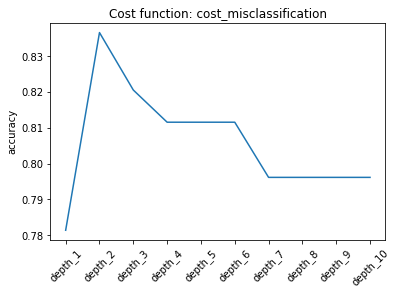

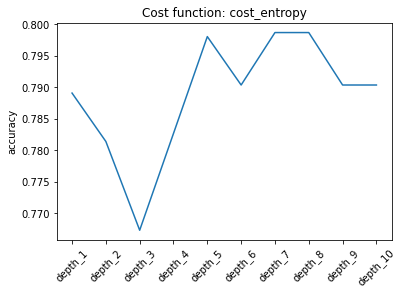

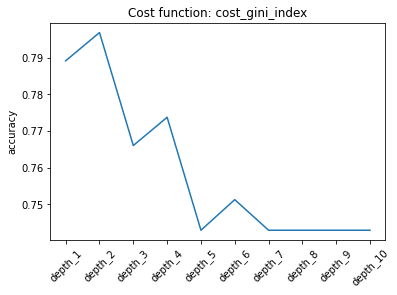

In [ ]:
dt_hepatitis = run_DT_all_cost_fn(df_hepatitis_final, [cost_misclassification, cost_entropy, cost_gini_index], 10)

In [ ]:
#At depth_2 using misclassification cost produces the highest accuracy of 83.7% (averaged accuracy across 10 fold-cv)
dt_hepatitis[0].depth_2.mean()

0.8365384615384615

## Train DT on the diabetes dataset with multiple depths using misclassification cost, entropy and gini index 

100%|██████████| 10/10 [05:30<00:00, 33.02s/it]


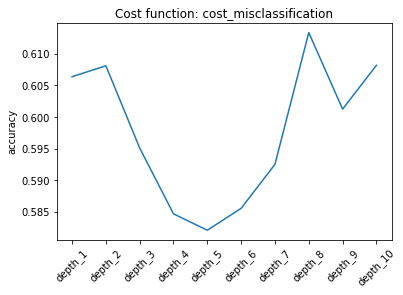

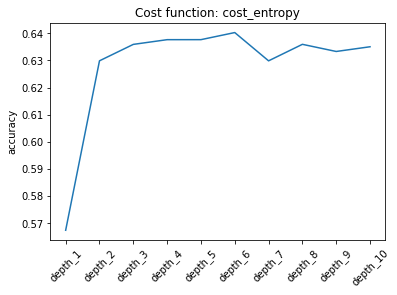

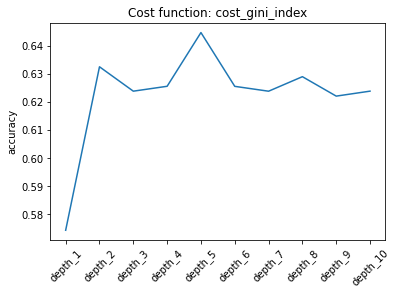

In [ ]:
#Will take roughly 23minutes
dt_diabetes = run_DT_all_cost_fn(df_diabetes_normalized, [cost_misclassification, cost_entropy, cost_gini_index], 10)

In [ ]:
# Best DT accuracy is at cost_gini_index and max_depth = 5, 64.4%
dt_diabetes[2].depth_5.mean()

0.6446701649175413

## Define a function to visualize the training and testing data 

In [ ]:
def plot_dt_data_visualization(df_data: pd.DataFrame, cost_fn : function, max_depth: int):
    
  #Transform X and Y data to Numpy
  X_data = df_data.loc[:, df_data.columns != 'Class']
  Y_data = df_data['Class']
  X_data_np = X_data.to_numpy()
  Y_data_np = Y_data.to_numpy()

  x_train, x_test, y_train, y_test = train_test_split(X_data_np, Y_data_np, test_size=0.30, random_state=1)

  tree = DecisionTree(max_depth=max_depth)
  probs_test = tree.fit(x_train, y_train).predict(x_test)
  y_pred = np.argmax(probs_test,1)
  accuracy = np.sum(y_pred == y_test)/y_test.shape[0]
  print(f'accuracy is {accuracy*100:.1f}.')

  #visualization
  correct = y_test == y_pred
  incorrect = np.logical_not(correct)
  plt.scatter(x_train[:,0], x_train[:,14], c=y_train, marker='o', alpha=.2, label='train')
  plt.scatter(x_test[correct,0], x_test[correct,14], marker='.', c=y_pred[correct], label='correct')
  plt.scatter(x_test[incorrect,0], x_test[incorrect,14], marker='x', c=y_test[incorrect], label='misclassified')
  plt.legend()
  plt.show()

## Visualize the best result for the hepatitis data

accuracy is 84.6.


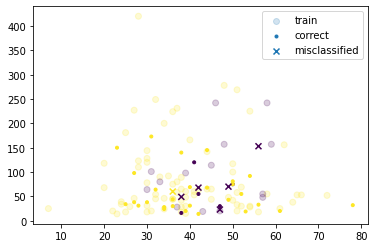

In [ ]:
plot_dt_data_visualization(df_hepatitis_final, cost_misclassification, 2)

## Define a function to plot the decision boundary for DT

In [ ]:
def plot_dt_decision_boundary(model: DecisionTree, x: pd.DataFrame, y: pd.DataFrame, x_index: int, y_index: int, y_labels: list) -> None:
    """
    Plots decision boundary for DT, by generating points on a 2D grid
    :param model: DT model, with max depth and cost function selected
    :param x: Feature columns
    :param y: Target column
    :param x_index: Index of column to display as X-axis on plot
    :param y_index: Index of column to display as Y-axis on plot
    :param y_labels: Label names for target column in the form [1, 0]
    :return: None
    """
    x_np = x.to_numpy()[:, x_index::y_index]
    y_np = y.to_numpy()

    (num_instances, num_features), num_classes = x.shape, np.max(y)+1

    # Generate points on a grid, currently using 200 samples
    x_train, x_test, y_train, y_test = train_test_split(x_np, y_np, random_state=1)
    x0v = np.linspace(np.min(x_np[:,0]), np.max(x_np[:,0]), 200)
    x1v = np.linspace(np.min(x_np[:,1]), np.max(x_np[:,1]), 200)
    x0, x1 = np.meshgrid(x0v, x1v)
    x_all = np.vstack((x0.ravel(),x1.ravel())).T

    # Get predictions of all points on the grid
    y_train_prob = np.zeros((y_train.shape[0], num_classes.astype(int)))
    y_train_prob[np.arange(y_train.shape[0]), y_train.astype(int)] = 1
    y_prob_all = model.fit(x_train, y_train).predict(x_all)
    y_pred_all = np.zeros_like(y_prob_all)
    y_pred_all[np.arange(x_all.shape[0]), np.argmax(y_prob_all, axis=-1)] = 1

    columns = x.columns.to_list()
    plt.clf()
    scatter = plt.scatter(x_train[:,0], x_train[:,1], c=y_train_prob[:,0], marker='o', alpha=1)
    plt.scatter(x_all[:,0], x_all[:,1], c=y_pred_all[:, 0], marker='.', alpha=0.01)
    plt.legend(handles=scatter.legend_elements()[0], labels=y_labels)
    plt.xlabel(columns[x_index])
    plt.ylabel(columns[y_index])
    plt.title(f'({model.cost_fn_name}, max_depth={model.max_depth}) DT Decision Boundary')
    plt.show()

## Plot some sample decision boundaries for the results of applying DT to the hepatitis dataset

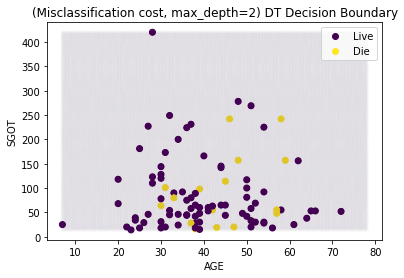

Note that this figure does not produce meaningful results since the split is not along the axes being visualized.


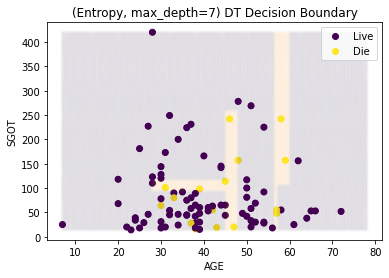

In [ ]:
x_hepatitis = df_hepatitis_final.loc[:, df_hepatitis_final.columns != 'Class']
y_hepatitis = df_hepatitis_final['Class']
plot_dt_decision_boundary(DecisionTree(max_depth=2, cost_fn=cost_misclassification), x_hepatitis, y_hepatitis, 0, 14, ['Live', 'Die'])

print("Note that this figure does not produce meaningful results since the split is not along the axes being visualized.")

plot_dt_decision_boundary(DecisionTree(max_depth=7, cost_fn=cost_entropy), x_hepatitis, y_hepatitis, 0, 14, ['Live', 'Die'])

## Plot a sample decision boundary for the results of applying DT to the diabetes dataset

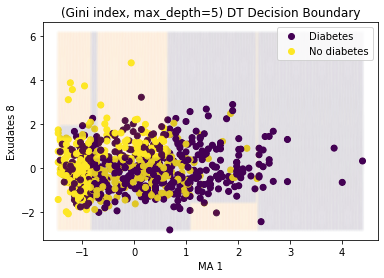

In [ ]:
x_diabetes = df_diabetes_normalized.loc[:, df_diabetes_normalized.columns != 'Class']
y_diabetes = df_diabetes_normalized['Class']
plot_dt_decision_boundary(DecisionTree(max_depth=5, cost_fn=cost_gini_index), x_diabetes, y_diabetes, 2, 15, ['Diabetes', 'No diabetes'])

## Define a function to run k-fold cross validation on a KNN model with all available distance functions and K values, and calculate the accuracy for each

In [ ]:
def run_knn(x: np.ndarray, y: np.ndarray, max_k: int=10, print_table: bool=False) -> dict:
    """
    Driver function to run KFold on KNN, across all available distance functions and prints the average accuracy folds for each k
    :param x: X of dataset
    :param y: y of dataset
    :param max_k: Maximum value of k to try out
    :param print_table: Whether to print the full results for each distance
    :return: Dictionary with distance function as key and accuracy results by fold & k as values
    """

    # Setting up KFold
    kf = KFold(n_splits=10)
    kf.get_n_splits(x)
    # Fetch all distance functions
    distances = KNN.dist_fn_map.keys()

    results = {}
    for i, dist_fn in enumerate(distances):
        df_next = pd.DataFrame()
        # Iterate through various values of k
        for k in range(1, max_k + 1):
            tmp = []
            # For each value of k, perform KFold validation
            for train_index, test_index in kf.split(x):
                x_train, x_test = x[train_index], x[test_index]
                y_train, y_test = y[train_index], y[test_index]
                knn = KNN(k=k, dist_fn=dist_fn)
                y_prob, neighbors, y_pred = knn.fit(x_train, y_train).predict(x_test)
                acc = evaluate_acc(y_test, y_pred)
                tmp.append(acc)
            df_next['k={}'.format(k)] = tmp
        df_next.reset_index(drop=True, inplace=True)
        df_next.index += 1
        # Store in dictionary
        results[dist_fn] = df_next
    for d in distances:
        # Plot relationship between k & average accuracy across the folds for each distance function
        fig = plt.figure()
        sns.lineplot(data=results[d].mean())
        plt.xticks(rotation=45)
        plt.ylabel('accuracy')
        plt.title(f'Distance function: {d}')
        plt.show()

        if print_table:
            print(results[d].mean())

    return results

## Define a function to plot the decision boundary for KNN

In [ ]:
def plot_knn_decision_boundary(model: KNN, x: pd.DataFrame, y: pd.DataFrame, x_index: int, y_index: int, y_labels: list) -> None:
    """
    Plots decision boundary for KNN, by generating points on a 2D grid
    :param model: KNN model, with k and distance function selected
    :param x: Feature columns
    :param y: Target column
    :param x_index: Index of column to display as X-axis on plot
    :param y_index: Index of column to display as Y-axis on plot
    :param y_labels: Label names for target column in the form [1, 0]
    :return: None
    """

    x_np = x.to_numpy()[:, x_index::y_index]
    y_np = y.to_numpy()

    # Generate points on a grid, currently using 200 samples
    x_train, x_test, y_train, y_test = train_test_split(x_np, y_np, random_state=1)
    x0v = np.linspace(np.min(x_np[:,0]), np.max(x_np[:,0]), 200)
    x1v = np.linspace(np.min(x_np[:,1]), np.max(x_np[:,1]), 200)
    x0, x1 = np.meshgrid(x0v, x1v)
    x_all = np.vstack((x0.ravel(),x1.ravel())).T

    # Get predictions of all points on the grid
    model.fit(x_train, y_train)
    y_train_prob = np.zeros((y_train.shape[0], model.c))
    y_train_prob[np.arange(y_train.shape[0]), y_train] = 1
    y_prob_all, _, __ = model.predict(x_all)
    y_pred_all = np.zeros_like(y_prob_all)
    y_pred_all[np.arange(x_all.shape[0]), np.argmax(y_prob_all, axis=-1)] = 1

    columns = x.columns.to_list()
    plt.clf()
    scatter = plt.scatter(x_train[:,0], x_train[:,1], c=y_train_prob[:,0], marker='o', alpha=1)
    plt.scatter(x_all[:,0], x_all[:,1], c=y_pred_all[:, 0], marker='.', alpha=0.01)
    plt.legend(handles=scatter.legend_elements()[0], labels=y_labels)
    plt.xlabel(columns[x_index])
    plt.ylabel(columns[y_index])
    plt.title(f'({model.dist_fn_name}, k={model.k}) KNN Decision Boundary')
    plt.show()


## Run KNN on the hepatitis dataset using euclidean distance, manhattan distance and hamming distance with K values from 1-15

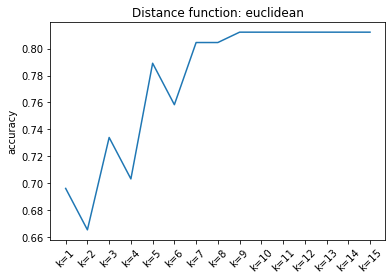

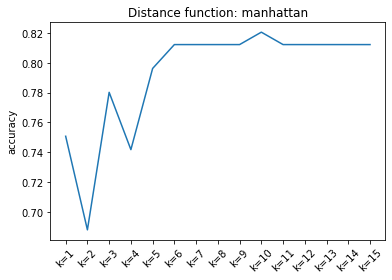

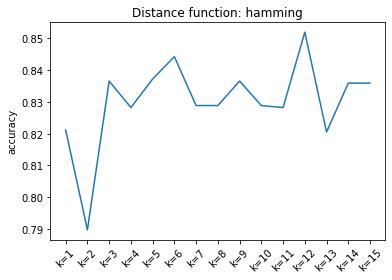

In [ ]:
x_hepatitis = df_hepatitis_final.loc[:, df_hepatitis_final.columns != 'Class']
y_hepatitis = df_hepatitis_final['Class']
x_hepatitis_np = x_hepatitis.to_numpy()
y_hepatitis_np = y_hepatitis.to_numpy()
knn_hepatitis = run_knn(x_hepatitis_np, y_hepatitis_np, max_k=15)

## Plot some sample decision boundaries for KNN on the hepatitis dataset


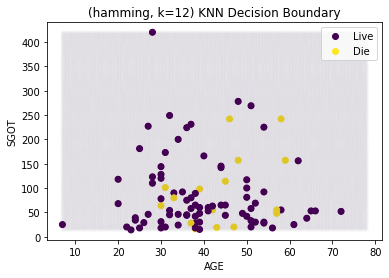

In [ ]:
plot_knn_decision_boundary(KNN(k=12, dist_fn='hamming'), x_hepatitis, y_hepatitis, 0, 14, ['Live', 'Die'])

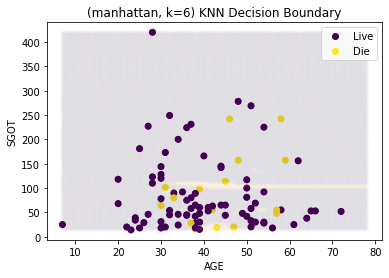

In [ ]:
plot_knn_decision_boundary(KNN(k=6, dist_fn='manhattan'), x_hepatitis, y_hepatitis, 0, 14, ['Live', 'Die'])

## Run KNN on the diabetes dataset using euclidean distance, manhattan distance and hamming distance with K values from 1-15

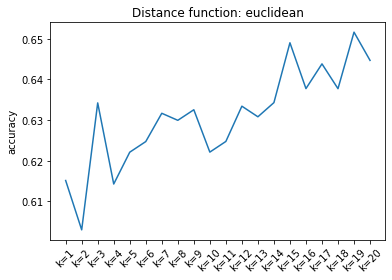

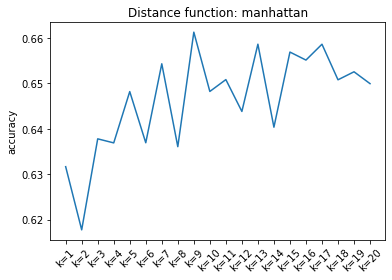

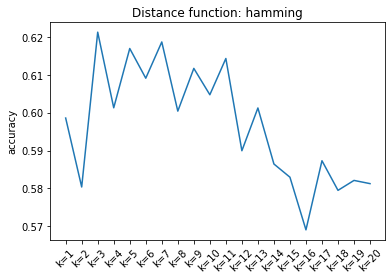

In [ ]:
x_diabetes = df_diabetes_normalized.loc[:, df_diabetes_normalized.columns != 'Class']
y_diabetes = df_diabetes_normalized['Class']
x_diabetes_np = x_diabetes.to_numpy()
y_diabetes_np = y_diabetes.to_numpy()
knn_diabetes = run_knn(x_diabetes_np, y_diabetes_np, max_k=20)

## Plot some sample decision boundaries for KNN on the diabetes dataset

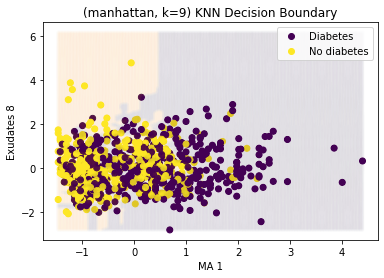

In [ ]:
plot_knn_decision_boundary(KNN(k=9, dist_fn='manhattan'), x_diabetes, y_diabetes, 2, 15, ['Diabetes', 'No diabetes'])

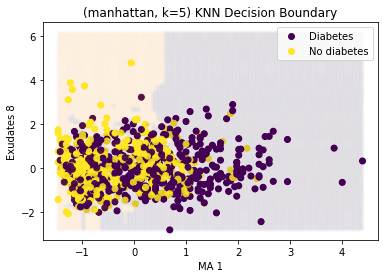

In [ ]:
plot_knn_decision_boundary(KNN(k=5, dist_fn='manhattan'), x_diabetes, y_diabetes, 2, 15, ['Diabetes', 'No diabetes'])

## Final comparison between KNN and DT for the hepatitis dataset

In [ ]:
print("KNN accuracy:", knn_hepatitis['hamming']['k=12'].mean())
print("DT accuracy:", dt_hepatitis[0].depth_2.mean())

print()
print("Here KNN has a higher accuracy, but they both have similar accuracies")

KNN accuracy: 0.851923076923077
DT accuracy: 0.8365384615384615

Here KNN has a higher accuracy, but they both have similar accuracies


## Final comparison between KNN and DT for the diabetes dataset

In [ ]:
print("KNN accuracy:", knn_diabetes['manhattan']['k=9'].mean())
print("DT accuracy:", dt_diabetes[2].depth_5.mean())

print()
print("Once again KNN has a higher accuracy, with the two models having similar accuracies")

KNN accuracy: 0.6612218890554723
DT accuracy: 0.6446701649175413

Once again KNN has a higher accuracy, with the two models having similar accuracies


## Obtaining the key features from the hepatitis dataset

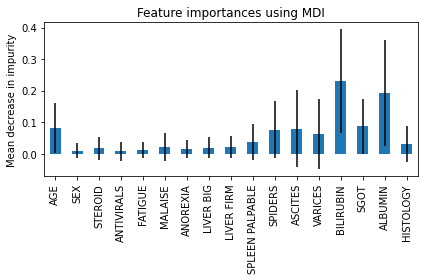

Note that the feature importance using MDI has a bias towards high cardinality features.
Since the hepatitis dataset has a combination of boolean, continuous, and discrete variables,
This is not an accurate representation of feature importance for this dataset.


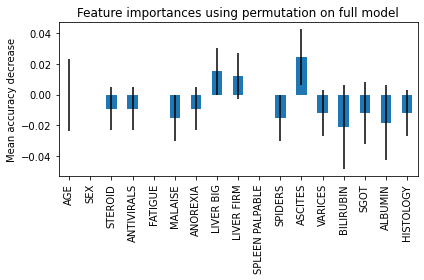

Rather, the feature importance using permutation on the full model overcomes this limitation,
indicating that BIG LIVER, FIRM LIVER and ASCITES are the 3 key features for this dataset.

Note that the key features are independent of the model used to analyze the dataset.
Therefore, BIG LIVER, FIRM LIVER and ASCITES are the key features for both KNN and DT.


In [ ]:
"""
Based on the scikit-learn guide "Feature importance with a forest of trees" (https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html)
"""

import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance

# Split the hepatitis dataset as done for previous computations
x_hepatitis = df_hepatitis_final.loc[:, df_hepatitis_final.columns != 'Class']
y_hepatitis = df_hepatitis_final['Class']
x_hepatitis_np = x_hepatitis.to_numpy()
y_hepatitis_np = y_hepatitis.to_numpy()
x_train, x_test, y_train, y_test = train_test_split(x_hepatitis_np, y_hepatitis_np, stratify=y_hepatitis_np, random_state=1)

# Fit a random forest classifier based on the hepatitis dataset
feature_names = list(x_hepatitis.columns)
forest = RandomForestClassifier(random_state=0)
forest.fit(x_train, y_train)

# Determine the feature importances using MDI
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
forest_importances = pd.Series(importances, index=feature_names)

# Plot the feature importances using MDI
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()
plt.show()

print("Note that the feature importance using MDI has a bias towards high cardinality features.")
print("Since the hepatitis dataset has a combination of boolean, continuous, and discrete variables,")
print("This is not an accurate representation of feature importance for this dataset.")

# Determine the feature importances using permutation on the full model
result = permutation_importance(
    forest, x_test, y_test, n_repeats=10, random_state=1, n_jobs=2
)
forest_importances = pd.Series(result.importances_mean, index=feature_names)

# Plot the feature importances using permutation on the full model
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

print("Rather, the feature importance using permutation on the full model overcomes this limitation,")
print("indicating that BIG LIVER, FIRM LIVER and ASCITES are the 3 key features for this dataset.")
print()
print("Note that the key features are independent of the model used to analyze the dataset.")
print("Therefore, BIG LIVER, FIRM LIVER and ASCITES are the key features for both KNN and DT.")

## Obtaining the key features from the diabetes dataset

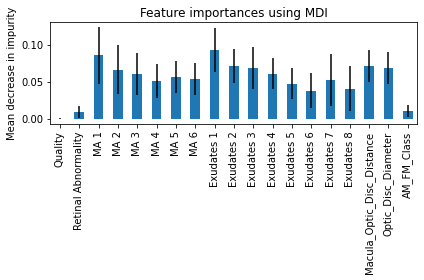

Note that the feature importance using MDI has a bias towards high cardinality features.
Since the diabetes dataset has a combination of boolean, continuous, and discrete variables,
This is not an accurate representation of feature importance for this dataset.


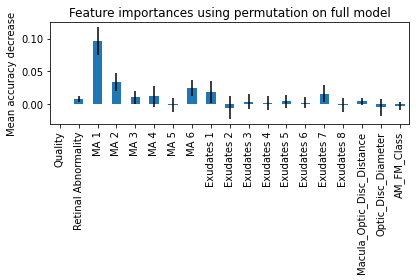

Rather, the feature importance using permutation on the full model overcomes this limitation,
indicating that MA1, MA2, MA6, Exudates 1 and Exudates 7 are the key features for this dataset.

Note that the key features are independent of the model used to analyze the dataset.
Therefore, MA1, MA2, MA6, Exudates 1 and Exudates 7 are the key features for both KNN and DT.


In [ ]:
"""
Based on the scikit-learn guide "Feature importance with a forest of trees" (https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html)
"""

import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance

# Split the diabetes dataset as done for previous computations
x_diabetes = df_diabetes_normalized.loc[:, df_diabetes_normalized.columns != 'Class']
y_diabetes = df_diabetes_normalized['Class']
x_diabetes_np = x_diabetes.to_numpy()
y_diabetes_np = y_diabetes.to_numpy()
x_train, x_test, y_train, y_test = train_test_split(x_diabetes_np, y_diabetes_np, stratify=y_diabetes_np, random_state=1)

# Fit a random forest classifier based on the diabetes dataset
feature_names = list(x_diabetes.columns)
forest = RandomForestClassifier(random_state=0)
forest.fit(x_train, y_train)

# Determine the feature importances using MDI
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
forest_importances = pd.Series(importances, index=feature_names)

# Plot the feature importances using MDI
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()
plt.show()

print("Note that the feature importance using MDI has a bias towards high cardinality features.")
print("Since the diabetes dataset has a combination of boolean, continuous, and discrete variables,")
print("This is not an accurate representation of feature importance for this dataset.")

# Determine the importances using permutation on the full model
result = permutation_importance(
    forest, x_test, y_test, n_repeats=10, random_state=1, n_jobs=2
)
forest_importances = pd.Series(result.importances_mean, index=feature_names)

# Plot the feature importances using permutation on the full model
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

print("Rather, the feature importance using permutation on the full model overcomes this limitation,")
print("indicating that MA1, MA2, MA6, Exudates 1 and Exudates 7 are the key features for this dataset.")
print()
print("Note that the key features are independent of the model used to analyze the dataset.")
print("Therefore, MA1, MA2, MA6, Exudates 1 and Exudates 7 are the key features for both KNN and DT.")

## Rerunning experiments on the hepatitis dataset with only the key features

In [ ]:
# Remove features from the dataset so that only the key features (LIVER BIG, LIVER FIRM, ASCITES) remain
df_hepatitis_key_features = df_hepatitis_final.drop(columns=['AGE','SEX','STEROID','ANTIVIRALS','FATIGUE','MALAISE',
                                                             'ANOREXIA','SPLEEN PALPABLE','SPIDERS','VARICES','BILIRUBIN',
                                                             'SGOT','ALBUMIN','HISTOLOGY'])

100%|██████████| 10/10 [00:01<00:00,  8.55it/s]


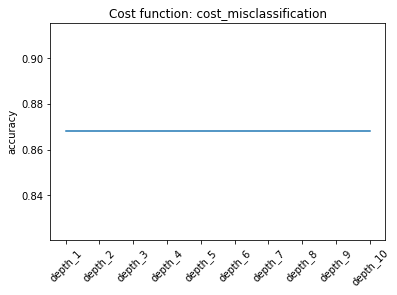

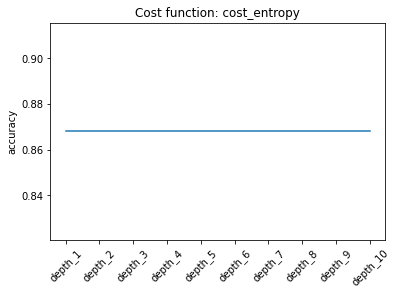

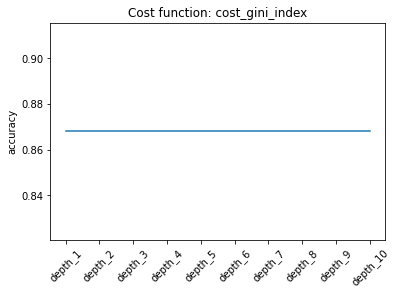

Here the performance is the same regardless of the cost function and tree depth.
This is because reducing the data to 3 binary inputs has oversimplified it, 
and therefore decision trees don't provide any useful results here, since no splitting is taking place.


In [ ]:
# Rerun the experiments with DT using the updated dataset
dt_hepatitis_key_features = run_DT_all_cost_fn(df_hepatitis_key_features, [cost_misclassification, cost_entropy, cost_gini_index], 10)

print("Here the performance is the same regardless of the cost function and tree depth.")
print("This is because reducing the data to 3 binary inputs has oversimplified it, ")
print("and therefore decision trees don't provide any useful results here, since no splitting is taking place.")

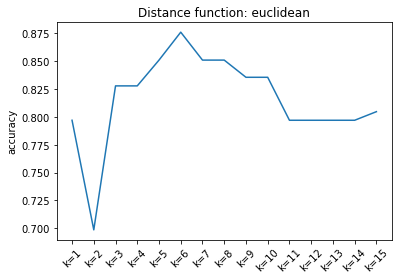

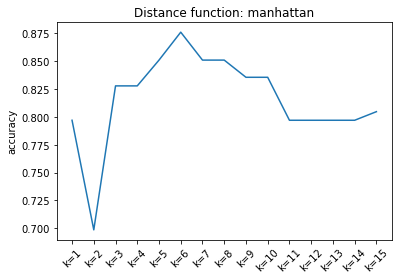

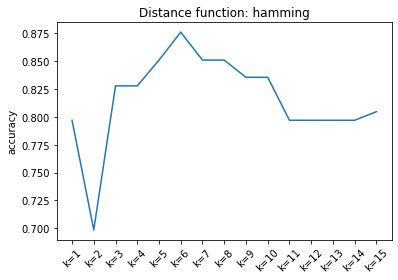

Despite the results being the same for all three distance functions due to the simplicity of the reduced dataset,
they show an increase in the maximum accuracy from 0.852 to 0.875.


In [ ]:
# Rerun the experiments with KNN using the updated dataset
x_hepatitis_key_features = df_hepatitis_key_features.loc[:, df_hepatitis_key_features.columns != 'Class']
y_hepatitis_key_features = df_hepatitis_key_features['Class']
x_hepatitis_key_features_np = x_hepatitis_key_features.to_numpy()
y_hepatitis_key_features_np = y_hepatitis_key_features.to_numpy()
knn_hepatitis_key_features = run_knn(x_hepatitis_key_features_np, y_hepatitis_key_features_np, max_k=15)

print("Despite the results being the same for all three distance functions due to the simplicity of the reduced dataset,")
print("they show an increase in the maximum accuracy from 0.852 to 0.875.")

## Rerunning experiments on the diabetes dataset with only the key features

In [ ]:
# Remove features from the dataset so that only the key features remain
df_diabetes_key_features = df_diabetes_normalized.drop(columns=['Quality','Retinal Abnormality','MA 3','MA 4','MA 5','Exudates 2',
                                                                'Exudates 3','Exudates 4','Exudates 5','Exudates 6','Exudates 8',
                                                                'Macula_Optic_Disc_Distance','Optic_Disc_Diameter','AM_FM_Class'])

100%|██████████| 10/10 [01:35<00:00,  9.59s/it]


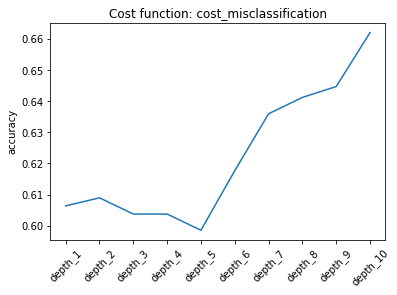

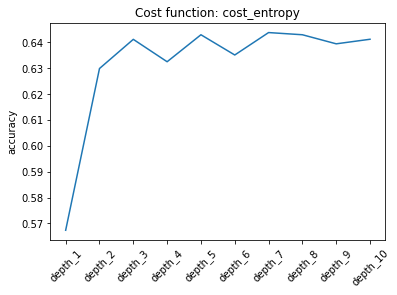

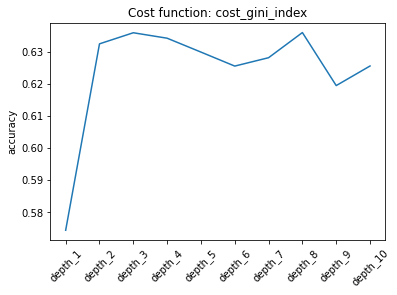

Here the results are roughly the same as they were originally, especially when using entropy or gini index.


In [ ]:
# Rerun the experiments with DT using the updated dataset
dt_diabetes_key_features = run_DT_all_cost_fn(df_diabetes_key_features, [cost_misclassification, cost_entropy, cost_gini_index], 10)

print("Here the results are roughly the same as they were originally, especially when using entropy or gini index.")

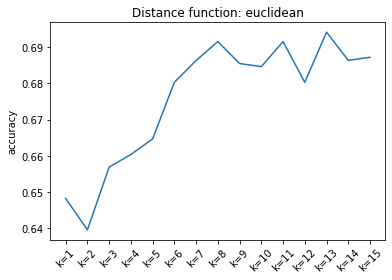

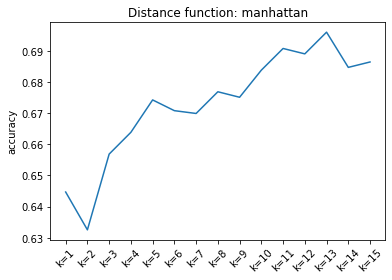

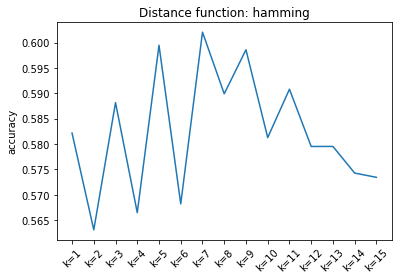

Here there is an increase in maximum accuracy from roughly 0.661 to 0.694.


In [ ]:
# Rerun the experiments with KNN using the updated dataset
x_diabetes_key_features = df_diabetes_key_features.loc[:, df_diabetes_key_features.columns != 'Class']
y_diabetes_key_features = df_diabetes_key_features['Class']
x_diabetes_key_features_np = x_diabetes_key_features.to_numpy()
y_diabetes_key_features_np = y_diabetes_key_features.to_numpy()
knn_diabetes_key_features = run_knn(x_diabetes_key_features_np, y_diabetes_key_features_np, max_k=15)

print("Here there is an increase in maximum accuracy from roughly 0.661 to 0.694.")